In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# Load the data from the CSV file
data = pd.read_csv("players_17.csv")

In [4]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17004,227986,https://sofifa.com/player/227986/tommy-ouldrid...,T. Ouldridge,Tommy Ouldridge,17,1998-11-26,173,61,England,Swindon Town,...,44+1,42+1,42+1,42+1,44+1,43+1,40+1,40+1,40+1,43+1
17005,212270,https://sofifa.com/player/212270/mark-foden/17...,M. Foden,Mark Foden,20,1996-03-19,180,80,Scotland,Ross County FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17006,223621,https://sofifa.com/player/223621/dean-mahon/17...,D. Mahon,Dean Mahon,18,1997-10-26,183,75,Republic of Ireland,Bohemian FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17007,228581,https://sofifa.com/player/228581/ben-kelly/17/...,B. Kelly,Ben Kelly,18,1997-07-26,183,82,Republic of Ireland,Dundalk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Sort the data based on the "club" column in descending order
sorted_data = data.sort_values("club", ascending=False)

In [6]:
# Save the sorted data to a new CSV file
sorted_data.to_csv("sorted_players_17.csv", index=False)

In [8]:
sort = pd.read_csv("sorted_players_17.csv")

In [9]:
sort

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,203879,https://sofifa.com/player/203879/alvaro-ricard...,Alvarinho,Álvaro Ricardo Faustino Gomes,25,1990-09-03,170,67,Portugal,Śląsk Wrocław,...,53+1,49+1,49+1,49+1,53+1,49+1,39+1,39+1,39+1,49+1
1,204778,https://sofifa.com/player/204778/joan-angel-ro...,Joan Román,Joan Ángel Román i Ollè,23,1993-05-18,175,70,Spain,Śląsk Wrocław,...,62+1,60+1,60+1,60+1,62+1,60+1,52+1,52+1,52+1,60+1
2,228931,https://sofifa.com/player/228931/bence-mervo/1...,B. Mervó,Bence Mervó,21,1995-03-05,185,83,Hungary,Śląsk Wrocław,...,47+1,48+1,48+1,48+1,47+1,45+1,42+1,42+1,42+1,45+1
3,219672,https://sofifa.com/player/219672/alhaji-gero/1...,A. Gero,Alhaji Gero,22,1993-10-10,189,80,Nigeria,Östersunds FK,...,40+1,42+1,42+1,42+1,40+1,38+1,40+1,40+1,40+1,38+1
4,231502,https://sofifa.com/player/231502/jamie-hopcutt...,J. Hopcutt,Jamie Hopcutt,24,1992-06-23,180,74,England,Östersunds FK,...,53+1,49+1,49+1,49+1,53+1,51+1,44+1,44+1,44+1,51+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17004,199305,https://sofifa.com/player/199305/mathias-witte...,M. Wittek,Mathias Wittek,27,1989-03-30,193,89,Germany,1. FC Heidenheim 1846,...,60+1,61+1,61+1,61+1,60+1,62+1,68+1,68+1,68+1,62+1
17005,229286,https://sofifa.com/player/229286/tim-skarke/17...,T. Skarke,Tim Skarke,19,1996-09-07,179,70,Germany,1. FC Heidenheim 1846,...,50+1,46+1,46+1,46+1,50+1,47+1,39+1,39+1,39+1,47+1
17006,222553,https://sofifa.com/player/222553/sebastian-gri...,S. Griesbeck,Sebastian Griesbeck,25,1990-10-03,189,84,Germany,1. FC Heidenheim 1846,...,67+1,70+1,70+1,70+1,67+1,67+1,71+1,71+1,71+1,67+1
17007,201925,https://sofifa.com/player/201925/kevin-kraus/1...,K. Kraus,Kevin Kraus,23,1992-08-12,190,91,Germany,1. FC Heidenheim 1846,...,58+1,63+1,63+1,63+1,58+1,61+1,70+1,70+1,70+1,61+1


In [21]:
# Select the top 5 clubs manually
top_clubs = ["FC Barcelona", "Real Madrid", "Manchester United", "Paris Saint-Germain", "Juventus"]
selected_data = sorted_data[sorted_data["club"].isin(top_clubs)]

# Save the selected data to a new CSV file
selected_data.to_csv("selected_players_17.csv", index=False)

In [22]:
club = pd.read_csv("selected_players_17.csv")

In [23]:
club

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,219836,https://sofifa.com/player/219836/ruben-yanez-a...,Rubén Yáñez,Rubén Yáñez Alabart,22,1993-10-12,190,81,Spain,Real Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,231856,https://sofifa.com/player/231856/alvaro-tejero...,Álvaro Tejero,Álvaro Tejero Sacristán,19,1996-07-20,172,65,Spain,Real Madrid,...,61+1,54+1,54+1,54+1,61+1,61+1,58+1,58+1,58+1,61+1
2,235522,https://sofifa.com/player/235522/aleix-febas-p...,Aleix Febas,Aleix Febas Pérez,20,1996-02-22,171,64,Spain,Real Madrid,...,61+1,62+1,62+1,62+1,61+1,58+1,54+1,54+1,54+1,58+1
3,235024,https://sofifa.com/player/235024/sergio-diaz/1...,S. Díaz,Sergio Ismael Díaz Velázquez,18,1998-03-05,170,70,Paraguay,Real Madrid,...,49+0,45+0,45+0,45+0,49+0,46+0,37+0,37+0,37+0,46+0
4,211234,https://sofifa.com/player/211234/enzo-fernande...,E. Fernández,Enzo Alan Zidane Fernández,21,1995-03-24,186,75,France,Real Madrid,...,48+1,46+1,46+1,46+1,48+1,44+1,36+1,36+1,36+1,44+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
150,199575,https://sofifa.com/player/199575/jordi-masip-l...,Jordi Masip,Jordi Masip López,27,1989-01-03,179,72,Spain,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
152,205600,https://sofifa.com/player/205600/samuel-umtiti...,S. Umtiti,Samuel Umtiti,22,1993-11-14,181,75,France,FC Barcelona,...,78+2,79+2,79+2,79+2,78+2,79+2,81+2,81+2,81+2,79+2


In [24]:
# Load the data from the CSV file
data = pd.read_csv("selected_players_17.csv")

# Replace NaN values with 0
clean_data = data.fillna(0)

# Save the clean data to a new CSV file
clean_data.to_csv("clean_data.csv", index=False)

In [25]:
clean = pd.read_csv("clean_data.csv")

In [26]:
clean

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,219836,https://sofifa.com/player/219836/ruben-yanez-a...,Rubén Yáñez,Rubén Yáñez Alabart,22,1993-10-12,190,81,Spain,Real Madrid,...,0,0,0,0,0,0,0,0,0,0
1,231856,https://sofifa.com/player/231856/alvaro-tejero...,Álvaro Tejero,Álvaro Tejero Sacristán,19,1996-07-20,172,65,Spain,Real Madrid,...,61+1,54+1,54+1,54+1,61+1,61+1,58+1,58+1,58+1,61+1
2,235522,https://sofifa.com/player/235522/aleix-febas-p...,Aleix Febas,Aleix Febas Pérez,20,1996-02-22,171,64,Spain,Real Madrid,...,61+1,62+1,62+1,62+1,61+1,58+1,54+1,54+1,54+1,58+1
3,235024,https://sofifa.com/player/235024/sergio-diaz/1...,S. Díaz,Sergio Ismael Díaz Velázquez,18,1998-03-05,170,70,Paraguay,Real Madrid,...,49+0,45+0,45+0,45+0,49+0,46+0,37+0,37+0,37+0,46+0
4,211234,https://sofifa.com/player/211234/enzo-fernande...,E. Fernández,Enzo Alan Zidane Fernández,21,1995-03-24,186,75,France,Real Madrid,...,48+1,46+1,46+1,46+1,48+1,44+1,36+1,36+1,36+1,44+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
150,199575,https://sofifa.com/player/199575/jordi-masip-l...,Jordi Masip,Jordi Masip López,27,1989-01-03,179,72,Spain,FC Barcelona,...,0,0,0,0,0,0,0,0,0,0
151,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
152,205600,https://sofifa.com/player/205600/samuel-umtiti...,S. Umtiti,Samuel Umtiti,22,1993-11-14,181,75,France,FC Barcelona,...,78+2,79+2,79+2,79+2,78+2,79+2,81+2,81+2,81+2,79+2


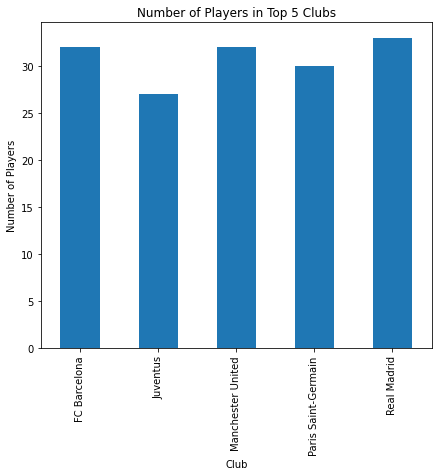

In [27]:
# Load the cleaned data from the CSV file
data = pd.read_csv("clean_data.csv")

# Group the data by the "club" column and count the number of players in each club
club_counts = data[data["club"].isin(top_clubs)].groupby("club")["long_name"].count()

# Create a bar plot of the club counts
club_counts.plot(kind="bar", figsize=(7, 6))

# Set the title and axis labels
plt.title("Number of Players in Top 5 Clubs")
plt.xlabel("Club")
plt.ylabel("Number of Players")

# Show the plot
plt.show()

In [28]:
print(club_counts)

club
FC Barcelona           32
Juventus               27
Manchester United      32
Paris Saint-Germain    30
Real Madrid            33
Name: long_name, dtype: int64


In [29]:
# Select players with a rating of 90 or above
top_players = data[data["overall"] >= 90]

# Print the selected players
print(top_players)

     sofifa_id                                         player_url  \
9        20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
23      173731  https://sofifa.com/player/173731/gareth-bale/1...   
68       41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
74      193080  https://sofifa.com/player/193080/david-de-gea-...   
136     158023  https://sofifa.com/player/158023/lionel-messi/...   
149     190871  https://sofifa.com/player/190871/neymar-da-sil...   
151     176580  https://sofifa.com/player/176580/luis-suarez/1...   

            short_name                            long_name  age         dob  \
9    Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   31  1985-02-05   
23             G. Bale                    Gareth Frank Bale   26  1989-07-16   
68      Z. Ibrahimović                   Zlatan Ibrahimović   34  1981-10-03   
74              De Gea                David De Gea Quintana   25  1990-11-07   
136           L. Messi       Lionel Andrés Mess

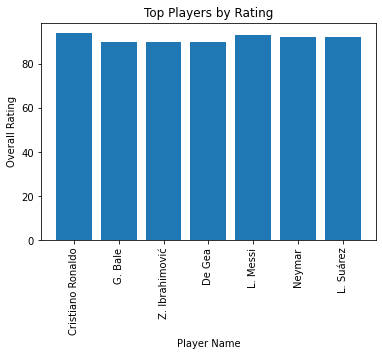

In [32]:

# Create a bar plot of the player ratings
plt.bar(top_players["short_name"], top_players["overall"])

# Set the title and axis labels
plt.title("Top Players by Rating")
plt.xlabel("Player Name")
plt.ylabel("Overall Rating")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

Correlation between overall and potential:  0.8239979583184351


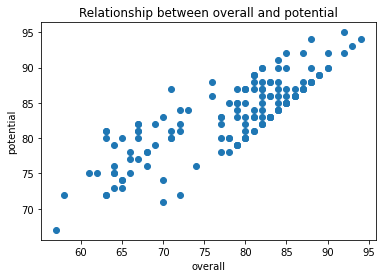

In [34]:
# Calculate the correlation between "overall" and "potential"
corr = data["overall"].corr(data["potential"])

print("Correlation between overall and potential: ", corr)

# Visualize the relationship between "overall" and "potential" using a scatter plot
plt.scatter(data["overall"], data["potential"])
plt.xlabel("overall")
plt.ylabel("potential")
plt.title("Relationship between overall and potential")
plt.show()


Correlation between overall and wage_eur:  0.9277548303358684


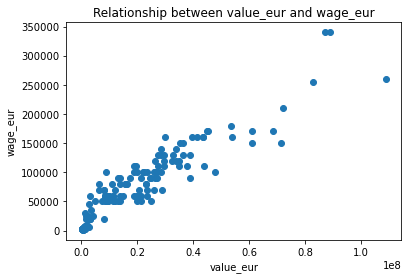

In [35]:
# Calculate the correlation between "value_eur" and "wage_eur"
corr1 = data["value_eur"].corr(data["wage_eur"])

print("Correlation between overall and wage_eur: ", corr1)

# Visualize the relationship between "value_eur" and "wage_eur" using a scatter plot
plt.scatter(data["value_eur"], data["wage_eur"])
plt.xlabel("value_eur")
plt.ylabel("wage_eur")
plt.title("Relationship between value_eur and wage_eur")
plt.show()

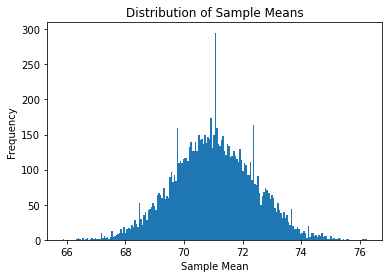

The standard error of the sample means is: 0.3089923688196037


In [122]:
# Set parameters
num_samples = 10000
sample_size = 20

# Initialize array to store sample means
sample_means = np.zeros(num_samples)

# Take random samples without replacement and calculate the mean of each sample
for i in range(num_samples):
    sample = data["potential"].sample(sample_size, replace=False)
    sample_means[i] = np.mean(sample)

# Plot the distribution of sample means
plt.hist(sample_means, bins=200)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means")
plt.show()

# Calculate the standard error of the sample means
std_err = np.std(sample_means) / np.sqrt(sample_size)

# Print the standard error
print("The standard error of the sample means is:", std_err)

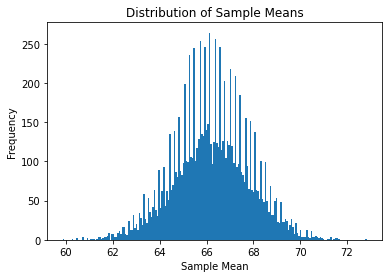

The standard error of the sample means is: 0.3578741441467237


In [123]:
# Set parameters
num_samples = 10000
sample_size = 20

# Initialize array to store sample means
sample_means = np.zeros(num_samples)

# Take random samples without replacement and calculate the mean of each sample
for i in range(num_samples):
    sample = data["overall"].sample(sample_size, replace=False)
    sample_means[i] = np.mean(sample)

# Plot the distribution of sample means
plt.hist(sample_means, bins=200)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means")
plt.show()

# Calculate the standard error of the sample means
std_err = np.std(sample_means) / np.sqrt(sample_size)

# Print the standard error
print("The standard error of the sample means is:", std_err)

In [38]:
# Generate num_samples bootstrap samples of size sample_size
for i in range(num_samples):
    # Take a random sample with replacement
    bootstrap_sample = np.random.choice(data["overall"], size=sample_size, replace=True)
    # Calculate the sample mean and store it in the sample_means array
    sample_means[i] = bootstrap_sample.mean()

# Calculate the 95% confidence interval
confidence_interval = np.percentile(sample_means, [2.5, 97.5])

print("95% confidence interval: ", confidence_interval)
print("Lower limit: ", confidence_interval[0])
print("Upper limit: ", confidence_interval[1])

95% confidence interval:  [74.6  81.85]
Lower limit:  74.6
Upper limit:  81.85


In [48]:
# Create a contingency table of short_name (as index) and preferred_foot (as columns)
cont_table = pd.crosstab(data["club"], data["preferred_foot"])

In [49]:
# Get the count of Real Madrid (R in index) with position Right
count_Madrid_Right = cont_table.loc["Real Madrid", "Right"]

In [50]:
print("count of Real Madrid (R in index) with position Right: ", count_Madrid_Right)

count of Real Madrid (R in index) with position Right:  26


In [64]:
cont_table

preferred_foot,Left,Right
club,,
FC Barcelona,9,23
Juventus,8,19
Manchester United,5,27
Paris Saint-Germain,9,21
Real Madrid,7,26


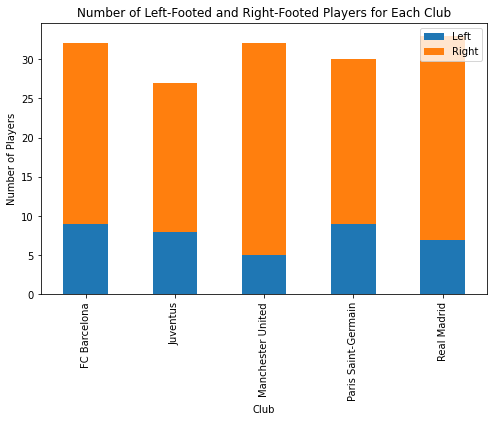

In [130]:

# Create a DataFrame from the provided data
data = pd.DataFrame({
    "club": ["FC Barcelona", "Juventus", "Manchester United", "Paris Saint-Germain", "Real Madrid"],
    "Left": [9, 8, 5, 9, 7],
    "Right": [23, 19, 27, 21, 26]
})

# Set the "club" column as the index of the DataFrame
data.set_index("club", inplace=True)

# Create a bar plot of the left-footed and right-footed players for each club
data.plot(kind="bar", stacked=True, figsize=(8, 5))

# Set the title and axis labels
plt.title("Number of Left-Footed and Right-Footed Players for Each Club")
plt.xlabel("Club")
plt.ylabel("Number of Players")

# Show the plot
plt.show()

In [70]:
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(data)

# Calculate the sum of chi-square value and p-value
sum_chi2_p = chi2 + p

print("Sum of chi-square value and p-value: ", sum_chi2_p)

Sum of chi-square value and p-value:  3.2615665895684063


In [71]:
# Calculate the expected frequency for the FC Barcelona with player foot left
row_total = data.loc["FC Barcelona"].sum()
col_total = data["Left"].sum()
grand_total = cont_table.values.sum()
expected_freq = (row_total * col_total) / grand_total

# Calculate the observed frequency for the FC Barcelona with player foot left
observed_freq = data.loc["FC Barcelona", "Left"]

# Calculate the Pearson residual
pearson_residual = (observed_freq - expected_freq) / ((expected_freq)**0.5)

print("Pearson residual for FC Barcelona with player foot left:", pearson_residual)

Pearson residual for FC Barcelona with player foot left: 0.3928454916559721


In [76]:
# Calculate the observed chi-squared statistic
observed_chi2, _, _, _ = chi2_contingency(cont_table)

# Set the number of permutations
num_permutations = 2000

# Initialize an array to store the permutation chi-squared statistics
perm_chi2 = np.zeros(num_permutations)

# Permute the Right variable and calculate the chi-squared statistic for each permutation
for i in range(num_permutations):
    permuted_group = np.random.permutation(data["Right"])
    permuted_cont_table = pd.crosstab(permuted_group, data["Left"])
    perm_chi2[i], _, _, _ = chi2_contingency(permuted_cont_table)

# Calculate the p-value as the proportion of permutation chi-squared statistics that are equal to or greater than the observed chi-squared statistic
p_value = (perm_chi2 >= observed_chi2).sum() / num_permutations

print("The p-value is:", p_value)

if p_value < 0.05:
    print("We reject the null hypothesis and conclude that there is a significant association between Right and Left.")
else:
    print("We fail to reject the null hypothesis and conclude that there is no significant association between Right and Left.")

The p-value is: 1.0
We fail to reject the null hypothesis and conclude that there is no significant association between Right and Left.


In [87]:
# performing T-Tests
from scipy.stats import ttest_ind

In [131]:
# Load the data into a pandas dataframe
data = pd.DataFrame({
    "club": ["FC Barcelona", "Juventus", "Manchester United", "Paris Saint-Germain", "Real Madrid"],
    "Left": [9, 8, 5, 9, 7],
    "Right": [23, 19, 27, 21, 26]
    })
# Perform a t-test for each team and print the results
for team in data["club"]:
    left_mean = data.loc[data["club"] == team, "Left"].mean()
    right_mean = data.loc[data["club"] == team, "Right"].mean()
    t_stat, p_value = ttest_ind(data.loc[data["club"] == team, "Left"], data.loc[data["club"] == team, "Right"])
    print(f"Team: {team}, Left mean: {left_mean}, Right mean: {right_mean}, p-value: {p_value}")

Team: FC Barcelona, Left mean: 9.0, Right mean: 23.0, p-value: nan
Team: Juventus, Left mean: 8.0, Right mean: 19.0, p-value: nan
Team: Manchester United, Left mean: 5.0, Right mean: 27.0, p-value: nan
Team: Paris Saint-Germain, Left mean: 9.0, Right mean: 21.0, p-value: nan
Team: Real Madrid, Left mean: 7.0, Right mean: 26.0, p-value: nan


C:\Users\baria\Python\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\baria\Python\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [89]:
# Load the data from the CSV file
data = pd.read_csv("players_17.csv")

In [90]:

# Select left-footed and right-footed players
left_footed = data[data['preferred_foot'] == 'Left']['overall']
right_footed = data[data['preferred_foot'] == 'Right']['overall']

# Perform t-test
t_stat, p_val = ttest_ind(left_footed, right_footed, equal_var=False)

# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  5.314273148792108
p-value:  1.1041103157036535e-07


In [92]:
# Performing ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [113]:
# Create a formula for the ANOVA
formula = 'overall ~ preferred_foot + club + age + pace + shooting + passing'

In [114]:
# Fit the ANOVA model
model = ols(formula, data).fit()

In [115]:
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

C:\Users\baria\Python\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 651, but rank is 650
  warnings.warn('covariance of constraints does not have full '


In [116]:
# Print the ANOVA table
print(anova_table)

                       sum_sq       df            F         PR(>F)
preferred_foot     311.240560      1.0    21.696130   3.222865e-06
club            152241.906418    651.0    16.301941   0.000000e+00
age              81946.563850      1.0  5712.376622   0.000000e+00
pace              6721.939023      1.0   468.576662  2.752778e-102
shooting           449.213941      1.0    31.314055   2.234795e-08
passing          23023.742042      1.0  1604.951808   0.000000e+00
Residual        206976.027925  14428.0          NaN            NaN


In [132]:
# Load the data from the CSV file
data = pd.read_csv("players_17.csv")

In [133]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17004,227986,https://sofifa.com/player/227986/tommy-ouldrid...,T. Ouldridge,Tommy Ouldridge,17,1998-11-26,173,61,England,Swindon Town,...,44+1,42+1,42+1,42+1,44+1,43+1,40+1,40+1,40+1,43+1
17005,212270,https://sofifa.com/player/212270/mark-foden/17...,M. Foden,Mark Foden,20,1996-03-19,180,80,Scotland,Ross County FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17006,223621,https://sofifa.com/player/223621/dean-mahon/17...,D. Mahon,Dean Mahon,18,1997-10-26,183,75,Republic of Ireland,Bohemian FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17007,228581,https://sofifa.com/player/228581/ben-kelly/17/...,B. Kelly,Ben Kelly,18,1997-07-26,183,82,Republic of Ireland,Dundalk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# Replace NaN values with 0
clean_data = data.fillna(0)

# Save the clean data to a new CSV file
clean_data.to_csv("clean_data.csv", index=False)

In [135]:
clean = pd.read_csv("clean_data.csv")

In [136]:
clean

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,0,0,0,0,0,0,0,0,0,0
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17004,227986,https://sofifa.com/player/227986/tommy-ouldrid...,T. Ouldridge,Tommy Ouldridge,17,1998-11-26,173,61,England,Swindon Town,...,44+1,42+1,42+1,42+1,44+1,43+1,40+1,40+1,40+1,43+1
17005,212270,https://sofifa.com/player/212270/mark-foden/17...,M. Foden,Mark Foden,20,1996-03-19,180,80,Scotland,Ross County FC,...,0,0,0,0,0,0,0,0,0,0
17006,223621,https://sofifa.com/player/223621/dean-mahon/17...,D. Mahon,Dean Mahon,18,1997-10-26,183,75,Republic of Ireland,Bohemian FC,...,0,0,0,0,0,0,0,0,0,0
17007,228581,https://sofifa.com/player/228581/ben-kelly/17/...,B. Kelly,Ben Kelly,18,1997-07-26,183,82,Republic of Ireland,Dundalk,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# Sort the data by player_position column in ascending order
sorted_data = data.sort_values(by=["team_position"])

# Sort the data by player_position column in descending order
sorted_data = data.sort_values(by=["team_position"], ascending=False)


In [140]:
sorted_data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13911,209893,https://sofifa.com/player/209893/jacob-pepper/...,J. Pepper,Jacob Pepper,24,1992-05-08,180,72,Australia,Brisbane Roar,...,57+1,60+1,60+1,60+1,57+1,58+1,62+1,62+1,62+1,58+1
6744,217525,https://sofifa.com/player/217525/ofir-davidzad...,O. Davidzada,Ofir Davidzada,25,1991-05-05,178,65,Israel,KAA Gent,...,67+1,64+1,64+1,64+1,67+1,67+1,65+1,65+1,65+1,67+1
6736,210361,https://sofifa.com/player/210361/bruno-godeau/...,B. Godeau,Bruno Godeau,24,1992-05-10,190,78,Belgium,KV Oostende,...,64+1,64+1,64+1,64+1,64+1,65+1,67+1,67+1,67+1,65+1
6737,210879,https://sofifa.com/player/210879/aljaz-struna/...,A. Struna,Aljaz Struna,25,1990-08-04,190,84,Slovenia,Carpi,...,65+1,64+1,64+1,64+1,65+1,67+1,70+1,70+1,70+1,67+1
13113,234449,https://sofifa.com/player/234449/emre-ugur-uru...,E. Uruç,Emre Uğur Uruç,22,1994-04-10,180,77,Turkey,Adanaspor,...,61+1,59+1,59+1,59+1,61+1,61+1,59+1,59+1,59+1,61+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15969,228989,https://sofifa.com/player/228989/seityasen-sin...,S. Singh,Seityasen Singh,24,1992-03-12,178,71,India,India,...,43+0,36+0,36+0,36+0,43+0,41+0,32+0,32+0,32+0,41+0
16258,208481,https://sofifa.com/player/208481/karanjit-sing...,K. Singh,Karanjit Singh,30,1986-01-08,182,86,India,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16479,234509,https://sofifa.com/player/234509/fulganco-card...,F. Cardozo,Fulganco Cardozo,28,1988-01-23,183,76,India,India,...,47+1,45+1,45+1,45+1,47+1,49+1,52+1,52+1,52+1,49+1
16625,233526,https://sofifa.com/player/233526/sumeet-passi/...,S. Passi,Sumeet Passi,21,1995-04-18,175,65,India,India,...,41+1,37+1,37+1,37+1,41+1,39+1,37+1,37+1,37+1,39+1


In [142]:
# Get only the rows with player_position = "LW"
lw_data = data[data["team_position"] == "LW"]

In [159]:
lw_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3


In [158]:
# Get only the rows with player_position = "ST"
st_data = data[data["team_position"] == "ST"]
st_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4


In [157]:
# Get only the rows with player_position = "RW"
rw_data = data[data["team_position"] == "RW"]
rw_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3


In [148]:
# Get only the rows with player_position = "GK"
gk_data = data[data["team_position"] == "GK"]
gk_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Get only the rows with player_position = "CB"
cb_data = data[data["team_position"] == "CB"]
cb_data[0:2]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
43,184344,https://sofifa.com/player/184344/leonardo-bonu...,L. Bonucci,Leonardo Bonucci,29,1987-05-01,190,86,Italy,Juventus,...,76+2,83+2,83+2,83+2,76+2,79+2,85+2,85+2,85+2,79+2
157,142780,https://sofifa.com/player/142780/gonzalo-rodri...,G. Rodríguez,Gonzalo Javier Rodríguez,32,1984-04-10,182,79,Argentina,Fiorentina,...,72+1,79+1,79+1,79+1,72+1,75+1,83+1,83+1,83+1,75+1


In [155]:
# Get only the rows with player_position = "LB"
lb_data = data[data["team_position"] == "LB"]
lb_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
32,197445,https://sofifa.com/player/197445/david-alaba/1...,D. Alaba,David Olatukunbo Alaba,24,1992-06-24,180,76,Austria,FC Bayern München,...,85+3,83+3,83+3,83+3,85+3,85+3,81+3,81+3,81+3,85+3


In [156]:
# Get only the rows with player_position = "RB"
rb_data = data[data["team_position"] == "RB"]
rb_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
24,121939,https://sofifa.com/player/121939/philipp-lahm/...,P. Lahm,Philipp Lahm,32,1983-11-11,170,66,Germany,FC Bayern München,...,86+3,85+3,85+3,85+3,86+3,85+3,81+3,81+3,81+3,85+3


In [153]:
# Get only the rows with player_position = "CAM"
cam_data = data[data["team_position"] == "CAM"]
cam_data[0:2]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
11,176635,https://sofifa.com/player/176635/mesut-ozil/17...,M. Özil,Mesut Özil,27,1988-10-15,183,76,Germany,Arsenal,...,58+3,57+3,57+3,57+3,58+3,52+3,41+3,41+3,41+3,52+3
30,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,24,1991-07-12,180,75,Colombia,Real Madrid,...,66+3,65+3,65+3,65+3,66+3,61+3,54+3,54+3,54+3,61+3


In [154]:
# Get only the rows with player_position = "CDM"
cdm_data = data[data["team_position"] == "CDM"]
cdm_data[0:1]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
33,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,27,1988-07-16,189,76,Spain,FC Barcelona,...,78+3,85+3,85+3,85+3,78+3,77+3,81+3,81+3,81+3,77+3


In [166]:
top_players_list = pd.concat([lw_data[0:1], rw_data[0:1], st_data[0:1], cam_data[0:2], cdm_data[0:1], rb_data[0:1], cb_data[0:2], lb_data[0:1], gk_data[0:1]])

In [167]:
top_players_list

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4
11,176635,https://sofifa.com/player/176635/mesut-ozil/17...,M. Özil,Mesut Özil,27,1988-10-15,183,76,Germany,Arsenal,...,58+3,57+3,57+3,57+3,58+3,52+3,41+3,41+3,41+3,52+3
30,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,24,1991-07-12,180,75,Colombia,Real Madrid,...,66+3,65+3,65+3,65+3,66+3,61+3,54+3,54+3,54+3,61+3
33,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,27,1988-07-16,189,76,Spain,FC Barcelona,...,78+3,85+3,85+3,85+3,78+3,77+3,81+3,81+3,81+3,77+3
24,121939,https://sofifa.com/player/121939/philipp-lahm/...,P. Lahm,Philipp Lahm,32,1983-11-11,170,66,Germany,FC Bayern München,...,86+3,85+3,85+3,85+3,86+3,85+3,81+3,81+3,81+3,85+3
43,184344,https://sofifa.com/player/184344/leonardo-bonu...,L. Bonucci,Leonardo Bonucci,29,1987-05-01,190,86,Italy,Juventus,...,76+2,83+2,83+2,83+2,76+2,79+2,85+2,85+2,85+2,79+2
157,142780,https://sofifa.com/player/142780/gonzalo-rodri...,G. Rodríguez,Gonzalo Javier Rodríguez,32,1984-04-10,182,79,Argentina,Fiorentina,...,72+1,79+1,79+1,79+1,72+1,75+1,83+1,83+1,83+1,75+1
32,197445,https://sofifa.com/player/197445/david-alaba/1...,D. Alaba,David Olatukunbo Alaba,24,1992-06-24,180,76,Austria,FC Bayern München,...,85+3,83+3,83+3,83+3,85+3,85+3,81+3,81+3,81+3,85+3


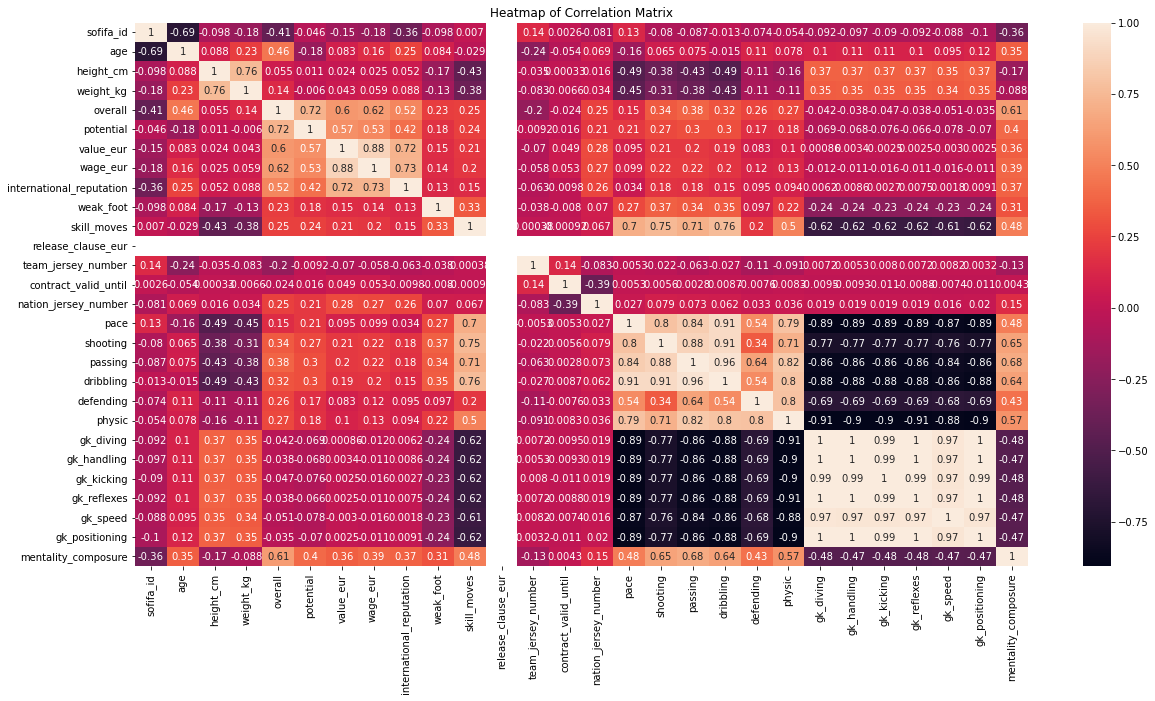

In [170]:
import seaborn as sns

plt.figure(figsize=(20,10))
corr = clean_data.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [171]:
import matplotlib.image as mpimg

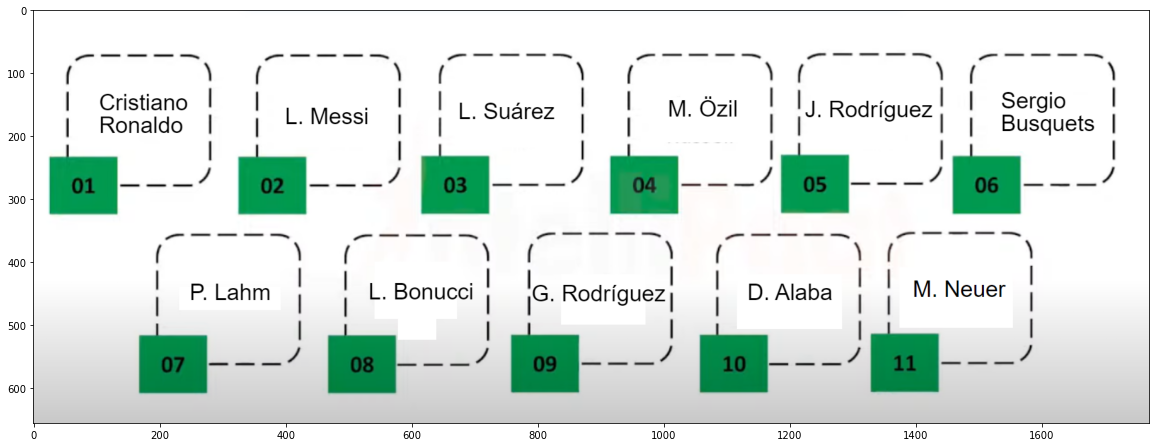

In [174]:
# Load the image
img = mpimg.imread("Football_team.png")

# Create a figure object with desired size
fig = plt.figure(figsize=(20, 10))

# Display the image
plt.imshow(img)
plt.show()